**Import the necessary packages**

In [749]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import pickle


**Load the data**

In [750]:
df = pd.read_csv("..\\Insurance_Dataset\\insurance.csv")

**Basic observation**

In [751]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [752]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [753]:
df.shape

(1338, 7)

- from the above code we found that no of observation is: 1338 and rows is: 6

In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [755]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [756]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

- from the above we found that there is no null value

- here there is no unnecessary columns so we souldnot drop any column

**Univariate Analysis**
- categorical columns
    - sex columns
    - smoker
    - region

Text(0.5, 0, 'Sex')

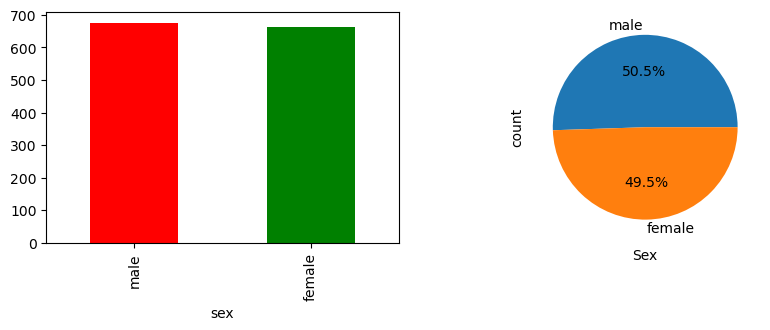

In [757]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
df['sex'].value_counts().plot(kind='bar', color = ['red', 'green'])
plt.subplot(1,2,2)
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Sex')

Text(0.5, 0, 'Smoker')

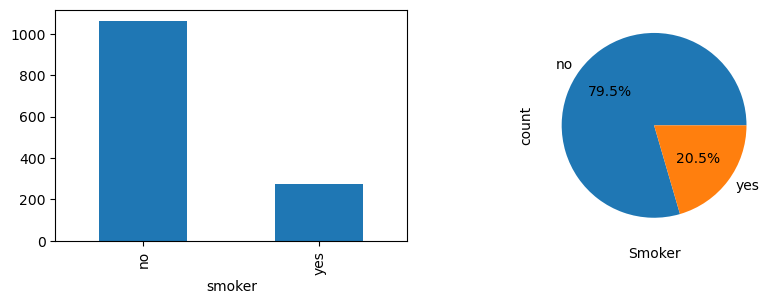

In [758]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
df['smoker'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Smoker')

Text(0.5, 0, 'Sex')

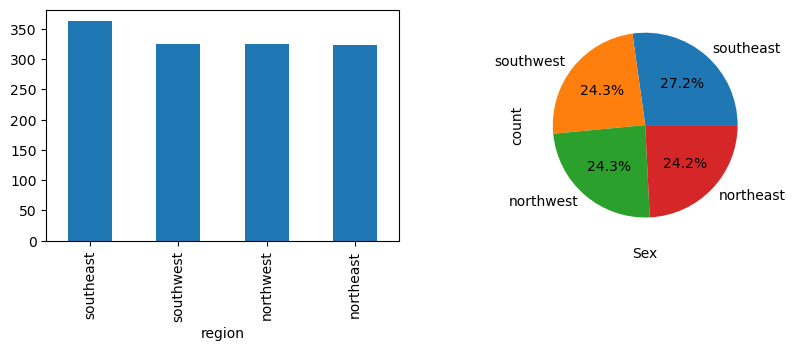

In [759]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
df['region'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
df['region'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Sex')

- Numerical columns

In [760]:
df.select_dtypes(exclude='object').columns

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

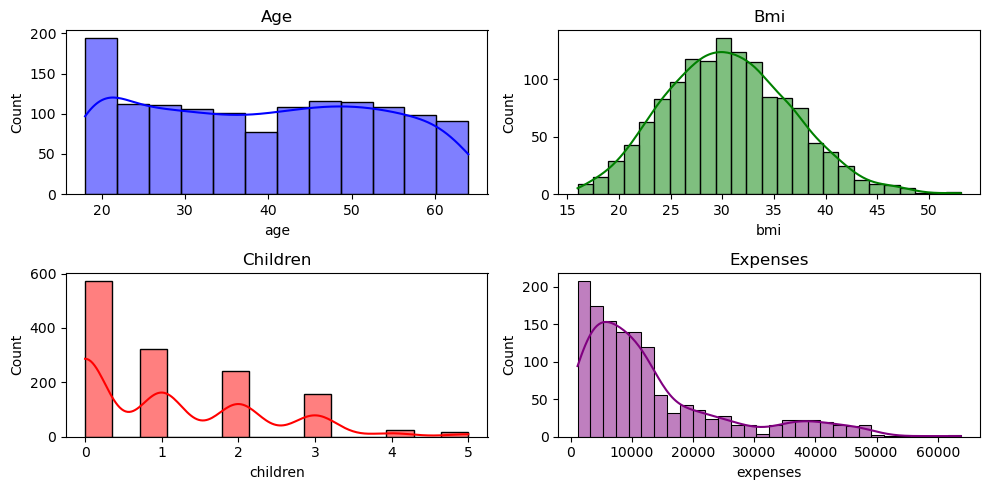

In [761]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
sns.histplot(df['age'], kde= True, ax = axes[0,0], color='blue', edgecolor='black')
axes[0,0].set_title('Age')
sns.histplot(df['bmi'], kde = True, ax = axes[0,1], color='green', edgecolor='black')
axes[0,1].set_title('Bmi')
sns.histplot(df['children'], kde = True, ax = axes[1,0],color='red', edgecolor='black')
axes[1,0].set_title('Children')
sns.histplot(df['expenses'], kde = True, ax = axes[1,1],color='purple', edgecolor='black')
axes[1,1].set_title('Expenses')

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the figure
plt.show()

**Bivariate Analysis**

- categorical vs categorical

In [762]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

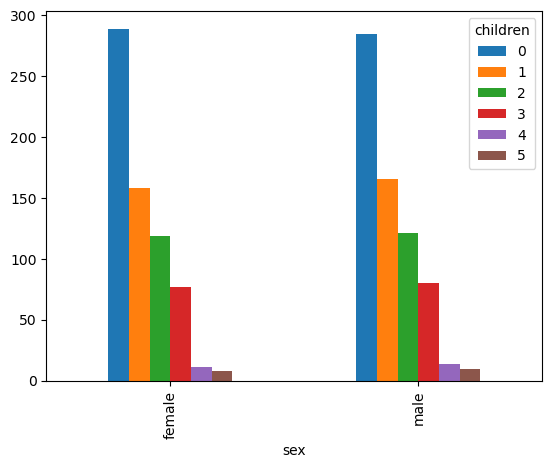

In [763]:
# sex vs children
result = pd.crosstab(df['sex'], df['children']).plot(kind= 'bar')

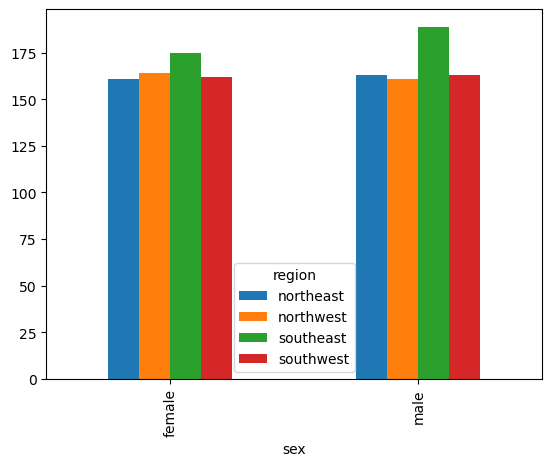

In [764]:
# sex vs region
result = pd.crosstab(df['sex'], df['region']).plot(kind= 'bar')

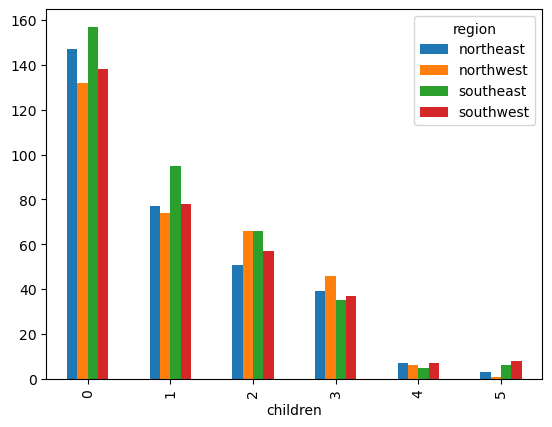

In [765]:
# sex vs children
result = pd.crosstab(df['children'], df['region']).plot(kind= 'bar')

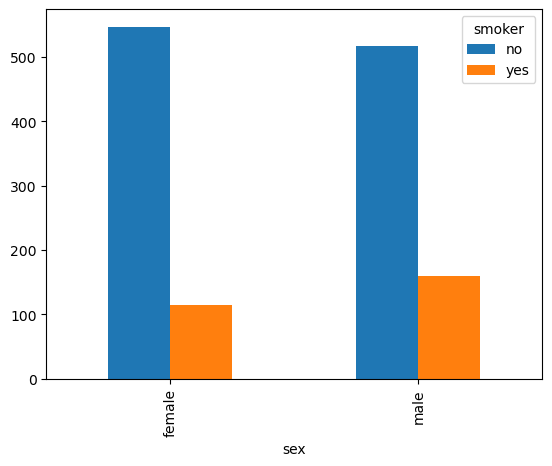

In [766]:
# sex vs smoker
result = pd.crosstab(df['sex'], df['smoker']).plot(kind= 'bar')

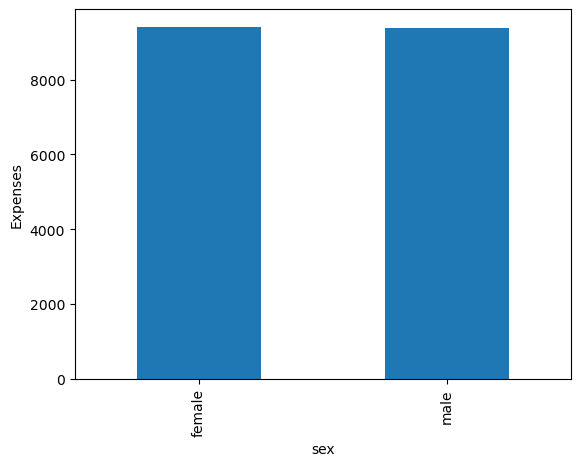

In [767]:
data.groupby("sex")['expenses'].median().plot.bar()
plt.ylabel('Expenses')
plt.show()

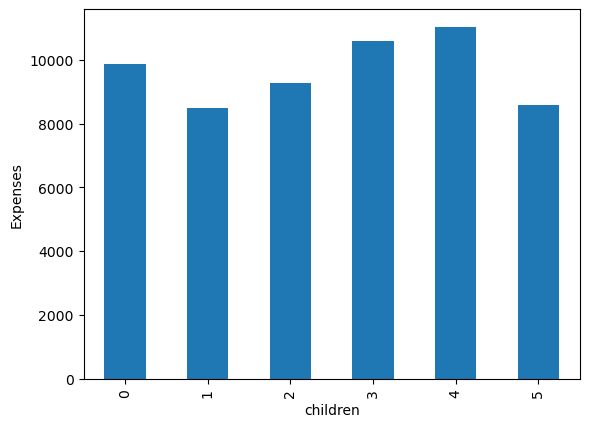

In [768]:
data.groupby("children")['expenses'].median().plot.bar()
plt.ylabel('Expenses')
plt.show()

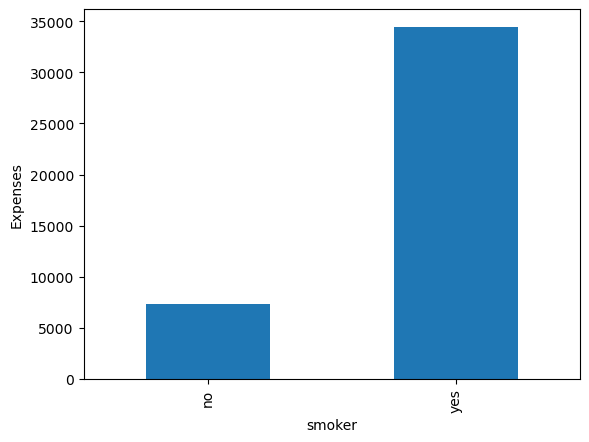

In [769]:
data.groupby("smoker")['expenses'].median().plot.bar()
plt.ylabel('Expenses')
plt.show()

- numerical vs numerical

In [770]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

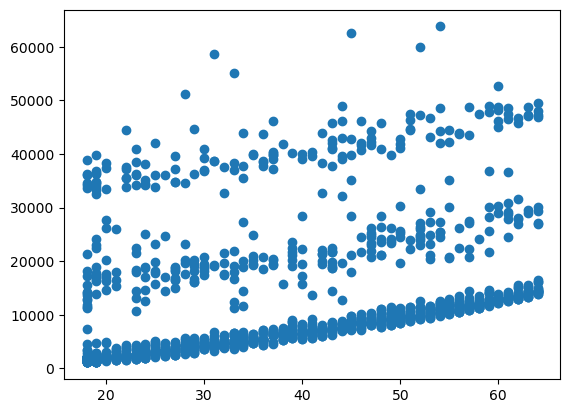

In [771]:
# age vs expenses
plt.scatter(df['age'], df['expenses'])

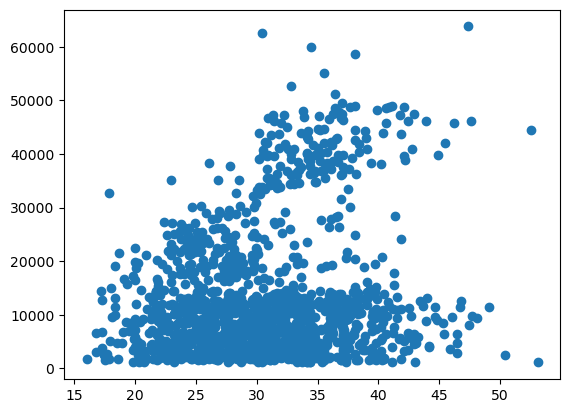

In [772]:
# bmi vs expenses
plt.scatter(df['bmi'], df['expenses'])

**Outliers**

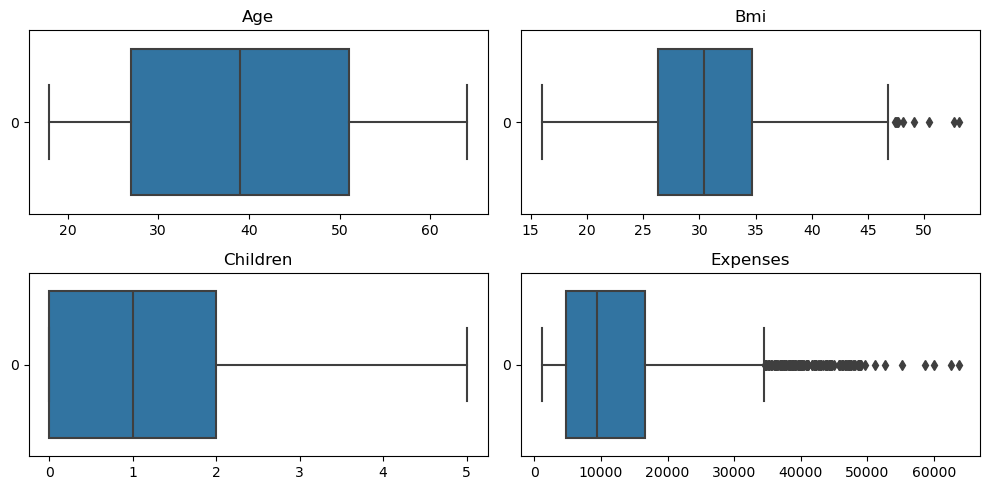

In [773]:
num_col = df.select_dtypes(exclude='object').columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
sns.boxplot(df['age'], ax = axes[0,0], orient='h')
axes[0,0].set_title('Age')
sns.boxplot(df['bmi'], ax = axes[0,1], orient='h')
axes[0,1].set_title('Bmi')
sns.boxplot(df['children'],  ax = axes[1,0], orient='h')
axes[1,0].set_title('Children')
sns.boxplot(df['expenses'], ax = axes[1,1], orient='h')
axes[1,1].set_title('Expenses')

plt.tight_layout()

- from the above obeservation we found that in expenses and bmi both contains outliers

**Dealing with outlier of columns Expenses**

In [774]:
Upper_bound = 0
Lower_bound = 0
def outlier(col):
    global Upper_bound, Lower_bound
    Q1 = np.quantile(df[col], 0.25)
    Q2 = np.quantile(df[col], 0.50)
    Q3 = np.quantile(df[col], 0.75)

    IQR = Q3 - Q1

    Upper_bound = Q3+1.5*IQR
    Lower_bound = Q1-1.5*IQR
    con1 = df[col]>Upper_bound
    con2 = df[col]<Lower_bound
    outliers_df = df[con1|con2]
    print(f"{col} has {len(outliers_df)} outliers")

num_col = df.select_dtypes(exclude='object').columns
for col in num_col:
    outlier(col)


age has 0 outliers
bmi has 9 outliers
children has 0 outliers
expenses has 139 outliers


In [775]:
# cap with median value
df['expenses'] = np.where(df['expenses']<Lower_bound, Lower_bound, df['expenses'])
df['expenses'] = np.where(df['expenses']>Upper_bound, Upper_bound, df['expenses'])

**Heatmap**

<Axes: >

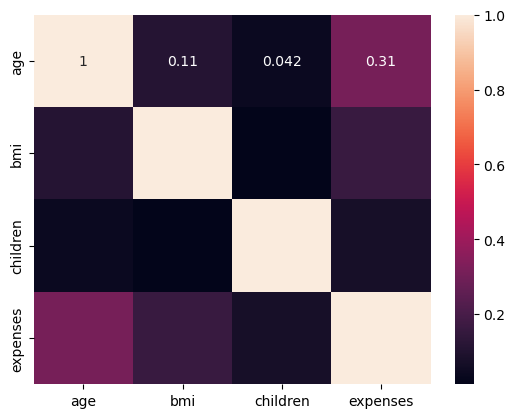

In [776]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

**convert the data into one scale using normalization**

In [777]:
col = df.select_dtypes(exclude='object').columns
ss = MinMaxScaler()
for i in col:
    if i != 'expenses':
        df[i] = ss.fit_transform(df[[i]])

**convert categorical column to numerical columns**

In [778]:
cat_cols = df.select_dtypes(include='object').columns
LE = LabelEncoder()
for i in cat_cols:
    df[i] = LE.fit_transform(df[i])

**Model Development**
- divide the data into input X_train and output y
- split the input data into X_train and X_test
- split the output data into y_train  and y_train


In [779]:
X = df.drop('expenses',axis = 1 )
y = df['expenses']

In [780]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size = 0.20)

In [781]:
X_train.shape

(1070, 6)

In [782]:
X_test.shape

(268, 6)

**Linear Regression**

In [783]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [784]:
# output generated by model
y_predict = LR.predict(X_test)

In [785]:
y_predict

array([ 9357.32344665,  7373.65950312, 32864.94075447,  9691.55875937,
       23652.09898478,  9560.53168981,  1831.56429391, 15368.05428065,
        2958.96089358, 11046.62977684, 25097.52385459,  9276.55966745,
        5823.48290209, 33030.28725089, 34718.39895267, 32086.73292942,
       13688.56567812, 31318.54236023,  9341.39232101, 28102.54380958,
        4778.83037677,  9668.14253515,  2964.29866764,  6658.74052793,
       11270.71798487, 12318.86866971, 13451.63967261,  6572.05135036,
       10125.75840561,  2925.94390636,  9144.15530945, 12540.89360607,
        4818.10520237,  4913.3346356 ,  4844.95226851, 11742.44596615,
        3033.62703837,  8809.98815306, 29896.97614684, 28376.82701869,
        4607.47345745,  4764.50019668, 13085.10488307, 11445.27204618,
        8375.94387468, 11766.44506556,  5547.9252467 ,  4234.74377919,
       30910.52382375,  8507.14704474, 14657.77243732,  3151.65899926,
       11227.90316391,  2538.10358795, 12510.72555725, 11910.85013323,
      

In [786]:
# Evaluation Metrics
MSE = mean_squared_error(y_test, y_predict)
R2 = r2_score(y_test, y_predict)
print("MSE", MSE)
print("R2", R2)

MSE 23418487.75576669
R2 0.7842738247790497


**Gradient boosting Regressor**

In [787]:
gbr = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1, max_depth=3, random_state=0)
gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("mean_squared_error", mse)
print("R2 score", r2)

mean_squared_error 17013369.637606412
R2 score 0.8432764234045258


In [788]:
y_pred

array([11545.36139231,  5679.94295889, 26805.45382282, 10062.43144029,
       33237.35378875,  4907.56100881,  3008.9617343 , 15410.48183826,
        4994.31199477, 10873.82713043, 17614.22039257,  7997.30004334,
        5715.76617618, 33958.50202144, 34234.98346298, 34263.99425446,
       11629.33861788, 34638.60959213,  9778.06900161, 23195.42685204,
        5276.74985028,  9110.11671697,  1966.13514274,  4403.78262774,
       11865.0314268 , 12938.76898256, 14494.25181823,  7259.63977644,
       11975.00035335,  2501.660443  ,  7133.3862856 , 12385.14782751,
        2939.92579989,  6213.34804228,  4211.51524925, 10323.50339006,
        3441.81612816,  8860.62422723, 26123.27828034, 33887.32766283,
        4080.64957282,  4156.06085562, 13190.05921433, 14369.58158479,
        7469.93717002, 16006.43700602,  7245.62977481,  6227.15886237,
       34334.61779774,  7046.60760355, 14715.69871623,  2632.93916214,
        6635.50087402,  2255.62368873, 11903.49340793, 11335.87254603,
      

- From the above observation we can say that performance(MSE & R-Sqaured) of Gradient boosting model is good as compared to other models. So we will save the Gradient Boosting model for further testing of the data using pickle library

In [789]:
# save the model using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(gbr, file)

In [790]:
# Load the model from a .pkl file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
if hasattr(model, 'n_features_in_'):
    num_features = model.n_features_in_
    print(f"The model was trained with {num_features} features.")
else:
    print("Number of features information is not available.")

The model was trained with 6 features.
